# HW2


Before submitting your **HTpy-HW2.ipynb** file, perform the following
* `Kernel>Restart & Run All`
* Make sure that there are no errors

The following includes problems that need coding and others that only need to perform simple operations (python as a calculator).

In [1]:
from Libraries import thermodynamics as thermo
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as csts

## 1 Insulation

This problem is an expansion of PB 3 in `HTpy-HW2.ipynb`

Assuming that the outer surface temperature of the pipe is $150^\circ C$, find an insulation that works (i.e. an insulation that will not melt, for which you can find the price and thermal conductivity online). Derive the necessary equations that allow for determination of the different costs as a function of the thickness. Generate a plot for at least 3 different thicknesses.

Hint: Derive the heat loss for a variable thickness of insulation, then apply this formula for a range of thicknesses. Compare savings of gas vs cost of insulation.

### Solution
Assumptions:
* Heat transfer is steady and 1D
* Conservation of energy is applied to the surface of the pipe. There is no energy generation in that control volume.


The money lost running the furnace due to the heat escaping with the 8-inch insulation over one year is $16.91.
The money lost running the furnace due to the heat escaping with the 9.5-inch insulation over one year is $14.28.
The money lost running the furnace due to the heat escaping with the 12-inch insulation over one year is $11.35.
The cost to insulate the pipe with 8-inch insulation is $31.28.
The cost to insulate the pipe with 9.5-inch insulation is $35.51.
The cost to insulate the pipe with 12-inch insulation is $48.19.


Text(0, 0.5, 'Temperature on Outside Surface (C)')

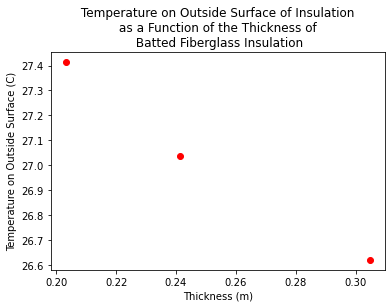

In [2]:
import math
from scipy.optimize import fsolve

Cost = 0.02 #$/MJ
t1 = 0.2032 #8 inches
t2 = 0.2413 #9.5 inches (standard)
t3 = 0.3048 #12 inches
k = 0.04 #W/m*K
T_pipe = 150 #C
T_infty = 25 #C
h_infty = 10 #W/m^2*K
d = 0.1 #m
L = 25 #m

####################################################
###Calculating the surface temperature of batted fiberglass insulation###
### with different thicknesses ###

T_ins1 = (h_infty*thermo.C2K(T_infty) + (k/t1)*thermo.C2K(T_pipe))/(h_infty + (k/t1)) #T_ins for thickness t1
T_ins2 = (h_infty*thermo.C2K(T_infty) + (k/t2)*thermo.C2K(T_pipe))/(h_infty + (k/t2)) #T_ins for thickness t2
T_ins3 = (h_infty*thermo.C2K(T_infty) + (k/t3)*thermo.C2K(T_pipe))/(h_infty + (k/t3)) #T_ins for thickness t3

T_ins1 = thermo.K2C(T_ins1)
T_ins2 = thermo.K2C(T_ins2)
T_ins3 = thermo.K2C(T_ins3)

# print('T_ins1 equals %.3f' %T_ins1)
# print('T_ins2 equals %.3f' %T_ins2)
# print('T_ins3 equals %.3f' %T_ins3)


#####################################################
###Calculating the heat fluxes through the different insulation surface###
###temperature values###

q_conv1 = h_infty*(T_ins1 - T_infty)
q_conv2 = h_infty*(T_ins2 - T_infty)
q_conv3 = h_infty*(T_ins3 - T_infty)

q_cond1 = k/t1*(T_pipe - T_ins1)
q_cond2 = k/t2*(T_pipe - T_ins2)
q_cond3 = k/t3*(T_pipe - T_ins3)

# print('q_conv1 equals %.3f W/m^2' %q_conv1)
# print('q_conv2 equals %.3f W/m^2' %q_conv2)
# print('q_conv3 equals %.3f W/m^2' %q_conv3)

# print('q_cond1 equals %.3f W/m^2' %q_cond1)
# print('q_cond2 equals %.3f W/m^2' %q_cond2)
# print('q_cond3 equals %.3f W/m^2' %q_cond3)


#####################################################
###Calculating the cost of natural gas for each insulation thickness###

rate = 0.02 #$/MJ

gas_cost1 = rate*(1/10**6)*(60/1)*(60/1)*(24/1)*(365/1)*q_cond1/0.9 #cost of running for 1 year
gas_cost2 = rate*(1/10**6)*(60/1)*(60/1)*(24/1)*(365/1)*q_cond2/0.9
gas_cost3 = rate*(1/10**6)*(60/1)*(60/1)*(24/1)*(365/1)*q_cond3/0.9


print('The money lost running the furnace due to the heat escaping with the 8-inch insulation over one year is $%.2f.' %gas_cost1)
print('The money lost running the furnace due to the heat escaping with the 9.5-inch insulation over one year is $%.2f.' %gas_cost2)
print('The money lost running the furnace due to the heat escaping with the 12-inch insulation over one year is $%.2f.' %gas_cost3)


#####################################################
###Calculating the total cost to insulate the pipe###

A = math.pi*d*L

# print('The surface area is %.2f' %A)

ins_cost1 = 0.37/0.092903 #Converting dollar/ft^2 to dollar/m^2
ins_cost2 = 0.42/0.092903 #Prices from https://www.energy.gov/energysaver/weatherize/insulation/types-insulation
ins_cost3 = 0.57/0.092903

totalins_cost1 = ins_cost1*A
totalins_cost2 = ins_cost2*A
totalins_cost3 = ins_cost3*A

print('The cost to insulate the pipe with 8-inch insulation is $%.2f.' %totalins_cost1)
print('The cost to insulate the pipe with 9.5-inch insulation is $%.2f.' %totalins_cost2)
print('The cost to insulate the pipe with 12-inch insulation is $%.2f.' %totalins_cost3)


import matplotlib.pyplot as plt


x = [t1,t2,t3]
y = [T_ins1,T_ins2,T_ins3]

plt.plot(x,y,'o',color = 'red')
plt.title(' Temperature on Outside Surface of Insulation \n as a Function of the Thickness of \n Batted Fiberglass Insulation')
plt.xlabel('Thickness (m)')
plt.ylabel('Temperature on Outside Surface (C)')


## 2 Window

Set up equations and apply realistic numerical values to them to discuss heat losses of a single pane window, a single pane window with storm window and a double paned window with air trapped at a vacuum of $10^{-3} \mathrm{torr}$ ina gap of $5\mathrm{mm}$. Do not consider the effects of radiation for any of the window.

<img src="ThermalCondAir.png" alt="my awesome sketch" width=100% >

### Solution
Assumptions:
* Heat transfer is steady and 1D


In [3]:
import math 
from scipy.optimize import fsolve

T_i = 70 #C
T_si = 14 #C

T_o = -10 #C
T_so = 12 #C

h_i = 10 #W/m^2.K
h_o = 25 #W/m^2.k

k = 0.8 #W/m^2.k
L = 2.38 #mm 

R_cond = L/k

R_convi = 1/h_i
R_convo = 1/h_o


Q_convi = -(1/R_convi)*(T_so - T_si) #Q_conv,i = Q_cond
Q_convo = (1/R_convo)*(T_so - T_o) 

Q_cond = (1/R_cond)*(T_so - T_si)


print('The heat loss due to convection is %.4f' %Q_convi)
print('The heat loss due to conduction is %.4f' %Q_cond)


The heat loss due to convection is 20.0000
The heat loss due to conduction is -0.6723


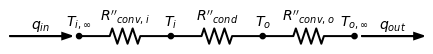

In [4]:
from Libraries import HT_thermal_resistance as res
import schemdraw as schem
import schemdraw.elements as e

Rth = []
Rth.append(res.Resistance("$R''_{conv,i}$",'W'))
Rth.append(res.Resistance("$R''_{cond}$",'W'))
Rth.append(res.Resistance("$R''_{conv,o}$",'W'))

### Single pane window thermal circuit
d = schem.Drawing()
d.add( e.DOT, label='$T_{i,\infty}$') #Ti,infty surface
R0 = d.add( e.RES, d='right', label=Rth[0].name ) #indoor convection resistance
d.add( e.DOT, label='$T_{i}$') #Ti surface
R1 = d.add( e.RES, d='right', label=Rth[1].name ) #inside the glass conduction resistance
d.add( e.DOT, label='$T_{o}$') #To surface
R1 = d.add( e.RES, d='right', label=Rth[2].name ) #outdoor convection resistance
d.add( e.DOT, label='$T_{o,\infty}$') #To,infty surface
L1 = d.add(e.LINE, toplabel = "$q_{in}$", endpts = [[-2.25, 0], [-0.25, 0]])
d.labelI(L1, arrowofst = 0)
L2 = d.add(e.LINE, toplabel = "$q_{out}$", endpts = [[9.25, 0], [11.25, 0]])
d.labelI(L2, arrowofst = 0)
d.draw()

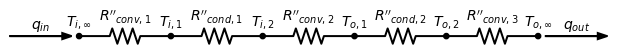

In [5]:
### Storm window thermal circuit

Rth1 = []
Rth1.append(res.Resistance("$R''_{conv,1}$",'W'))
Rth1.append(res.Resistance("$R''_{cond,1}$",'W'))
Rth1.append(res.Resistance("$R''_{conv,2}$",'W'))
Rth1.append(res.Resistance("$R''_{cond,2}$",'W'))
Rth1.append(res.Resistance("$R''_{conv,3}$",'W'))

d = schem.Drawing()
d.add( e.DOT, label='$T_{i,\infty}$') #Ti,infty surface
R0 = d.add( e.RES, d='right', label=Rth1[0].name ) #indoor convection resistance
d.add( e.DOT, label='$T_{i,1}$') #Ti,1 surface
R1 = d.add( e.RES, d='right', label=Rth1[1].name ) #inside the glass conduction resistance
d.add( e.DOT, label='$T_{i,2}$') #Ti,2 surface
R1 = d.add( e.RES, d='right', label=Rth1[2].name ) #middle convection resistance
d.add( e.DOT, label='$T_{o,1}$') #To,1 surface
R1 = d.add( e.RES, d='right', label=Rth1[3].name ) #inside the glass conduction resistance
d.add( e.DOT, label='$T_{o,2}$') #To,2 surface
R1 = d.add( e.RES, d='right', label=Rth1[4].name ) #outdoor convection resistance
d.add( e.DOT, label='$T_{o,\infty}$') #To,infty surface
L1 = d.add(e.LINE, toplabel = "$q_{in}$", endpts = [[-2.25, 0], [-0.25, 0]])
d.labelI(L1, arrowofst = 0)
L2 = d.add(e.LINE, toplabel = "$q_{out}$", endpts = [[15.25, 0], [17.25, 0]])
d.labelI(L2, arrowofst = 0)
d.draw()

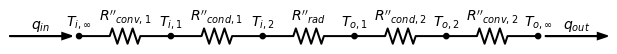

In [6]:
### Vacuum window thermal circuit

Rth1 = []
Rth1.append(res.Resistance("$R''_{conv,1}$",'W'))
Rth1.append(res.Resistance("$R''_{cond,1}$",'W'))
Rth1.append(res.Resistance("$R''_{rad}$",'W'))
Rth1.append(res.Resistance("$R''_{cond,2}$",'W'))
Rth1.append(res.Resistance("$R''_{conv,2}$",'W'))

d = schem.Drawing()
d.add( e.DOT, label='$T_{i,\infty}$') #Ti,infty surface
R0 = d.add( e.RES, d='right', label=Rth1[0].name ) #indoor convection resistance
d.add( e.DOT, label='$T_{i,1}$') #Ti,1 surface
R1 = d.add( e.RES, d='right', label=Rth1[1].name ) #inside the glass conduction resistance
d.add( e.DOT, label='$T_{i,2}$') #Ti,2 surface
R1 = d.add( e.RES, d='right', label=Rth1[2].name ) #middle convection resistance
d.add( e.DOT, label='$T_{o,1}$') #To,1 surface
R1 = d.add( e.RES, d='right', label=Rth1[3].name ) #inside the glass conduction resistance
d.add( e.DOT, label='$T_{o,2}$') #To,2 surface
R1 = d.add( e.RES, d='right', label=Rth1[4].name ) #outdoor convection resistance
d.add( e.DOT, label='$T_{o,\infty}$') #To,infty surface
L1 = d.add(e.LINE, toplabel = "$q_{in}$", endpts = [[-2.25, 0], [-0.25, 0]])
d.labelI(L1, arrowofst = 0)
L2 = d.add(e.LINE, toplabel = "$q_{out}$", endpts = [[15.25, 0], [17.25, 0]])
d.labelI(L2, arrowofst = 0)
d.draw()